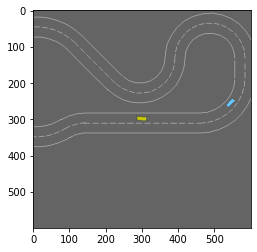

In [43]:
import gym
import highway_env
from matplotlib import pyplot as plt
import numpy as np

env = gym.make("racetrack-v0")
env.reset()
for _ in range(3):
    action = [0.1,0.1]
    obs, reward, done, info = env.step(action)
    env.render()

plt.imshow(env.render(mode="rgb_array"))
plt.show()

In [44]:
import pprint

env = gym.make("racetrack-v0")
pprint.pprint(env.config)

{'action': {'lateral': True,
            'longitudinal': False,
            'target_speeds': [0, 5, 10],
            'type': 'ContinuousAction'},
 'action_reward': -0.3,
 'centering_position': [0.5, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 300,
 'lane_centering_cost': 4,
 'manual_control': False,
 'observation': {'align_to_vehicle_axes': True,
                 'as_image': False,
                 'features': ['presence', 'on_road'],
                 'grid_size': [[-18, 18], [-18, 18]],
                 'grid_step': [3, 3],
                 'type': 'OccupancyGrid'},
 'offscreen_rendering': False,
 'other_vehicles': 1,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 5,
 'real_time_rendering': False,
 'render_agent': True,
 'scaling': 5.5,
 'screen_height': 600,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15}


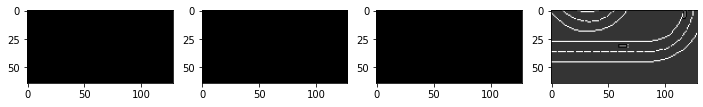

In [45]:
from matplotlib import pyplot as plt
config = {
       "observation": {
           "type": "GrayscaleObservation",
           "observation_shape": (128, 64),
           "stack_size": 4,
           "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
           "scaling": 1.75,
       },
       "policy_frequency": 2
   }
env.configure(config)
obs = env.reset()

_, axes = plt.subplots(ncols=4, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
plt.show()

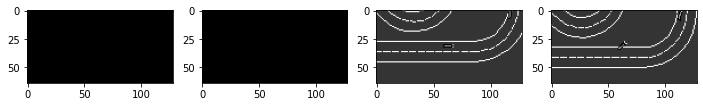

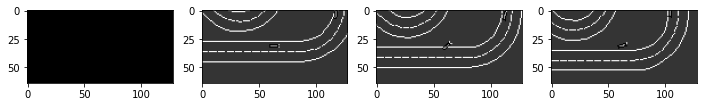

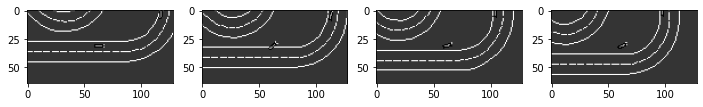

In [46]:
for _ in range(3):
    action = [np.random.uniform(-1,1), np.random.uniform(-1,1)]
    obs, _, _, _ = env.step(action)
    _, axes = plt.subplots(ncols=4, figsize=(12, 5))

    for i, ax in enumerate(axes.flat):
        ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
plt.show()

In [47]:
import gym
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv

import highway_env


def train_env():
    env = gym.make('highway-fast-v0')
    env.configure({
        "observation": {
            "type": "GrayscaleObservation",
            "observation_shape": (128, 64),
            "stack_size": 4,
            "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
            "scaling": 1.75,
        },
    })
    env.reset()
    return env


def test_env():
    env = train_env()
    env.configure({"policy_frequency": 15, "duration": 20 * 15})
    env.reset()
    return env


if __name__ == '__main__':
    # Train
    model = DQN('CnnPolicy', DummyVecEnv([train_env]),
                learning_rate=5e-4,
                buffer_size=15000,
                learning_starts=200,
                batch_size=32,
                gamma=0.8,
                train_freq=1,
                gradient_steps=1,
                target_update_interval=50,
                exploration_fraction=0.7,
                verbose=1,
                tensorboard_log="highway_cnn/")
    model.learn(total_timesteps=int(1e5))
    model.save("highway_cnn/model")

    # Record video
    model = DQN.load("highway_cnn/model")

    env = DummyVecEnv([test_env])
    video_length = 2 * env.envs[0].config["duration"]
    env = VecVideoRecorder(env, "highway_cnn/videos/",
                           record_video_trigger=lambda x: x == 0, video_length=video_length,
                           name_prefix="dqn-agent")
    obs = env.reset()
    for _ in range(video_length + 1):
        action, _ = model.predict(obs)
        obs, _, _, _ = env.step(action)
    env.close()

ModuleNotFoundError: No module named 'stable_baselines3'